## **Task 2 - Business and data analytics**
## Chinmoy Dutta
## k-means clusturing for Iris dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Dropping Id column as it is not required

data.drop('Id', axis=1, inplace=True)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
print(data.isnull().sum()),     # No missing values
'\n\nNumber of Duplicates rows: ', data.duplicated().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


('\n\nNumber of Duplicates rows: ', 3)

In [7]:
# Dropping duplicates rows

data.drop_duplicates(inplace=True)
data.shape[0]       #returns no of rows, not including duplicates

147

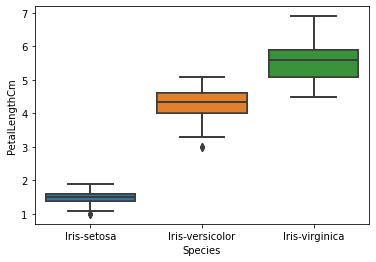

In [8]:
# Checking for outliners in numeric data

for i in data.columns:
    if data[i].dtypes == 'float64':
        sns.boxplot(x="Species",y="PetalLengthCm",data = data)
plt.show()
#         print(i)
#         plt.figure(figsize=(6,3))
#         sns.boxplot(data[i])
#         plt.show()


# sns.boxplot(x="Species",y="PetalLengthCm",data = data)
# plt.show()

## **understanding data**

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


<AxesSubplot:xlabel='Species', ylabel='count'>

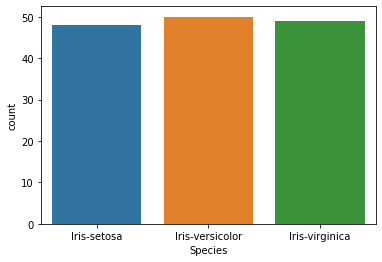

In [9]:
## target class

print(data.Species.value_counts())
sns.countplot(data.Species)

In [10]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=data["Species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,48
Iris-versicolor,50
Iris-virginica,49


In [13]:
iris_setosa=data.loc[data["Species"]=="Iris-setosa"]
iris_virginica=data.loc[data["Species"]=="Iris-virginica"]
iris_versicolor=data.loc[data["Species"]=="Iris-versicolor"]

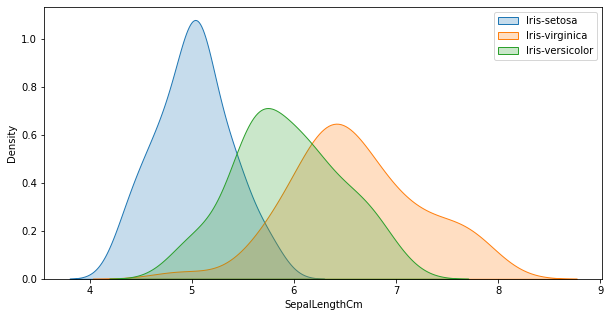

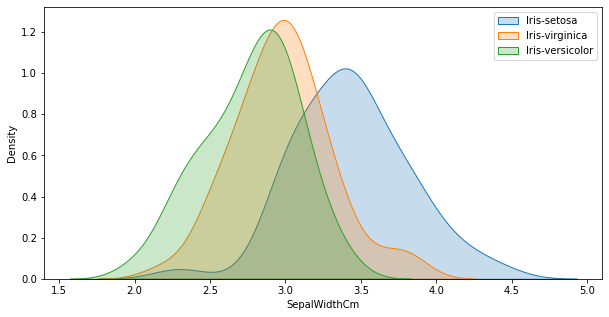

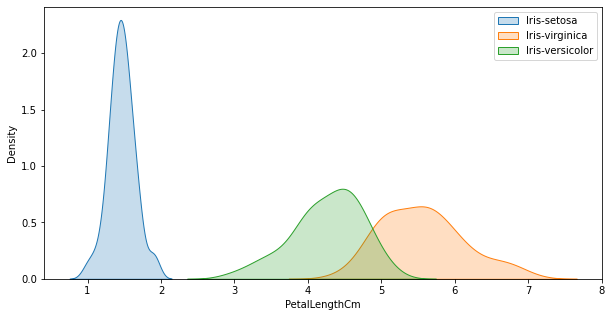

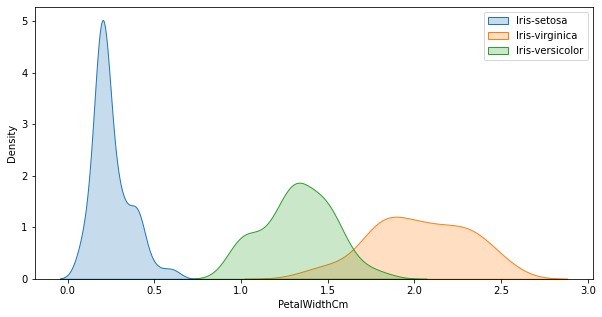

In [14]:
# Distribution feature by Species
for i in data.columns[:-1]:
    plt.figure(figsize=(10,5))
    sns.kdeplot(iris_setosa[i], label="Iris-setosa", shade=True)
    sns.kdeplot(iris_virginica[i], label="Iris-virginica", shade=True)
    sns.kdeplot(iris_versicolor[i], label="Iris-versicolor", shade=True)
    plt.legend()
    plt.show()

<AxesSubplot:>

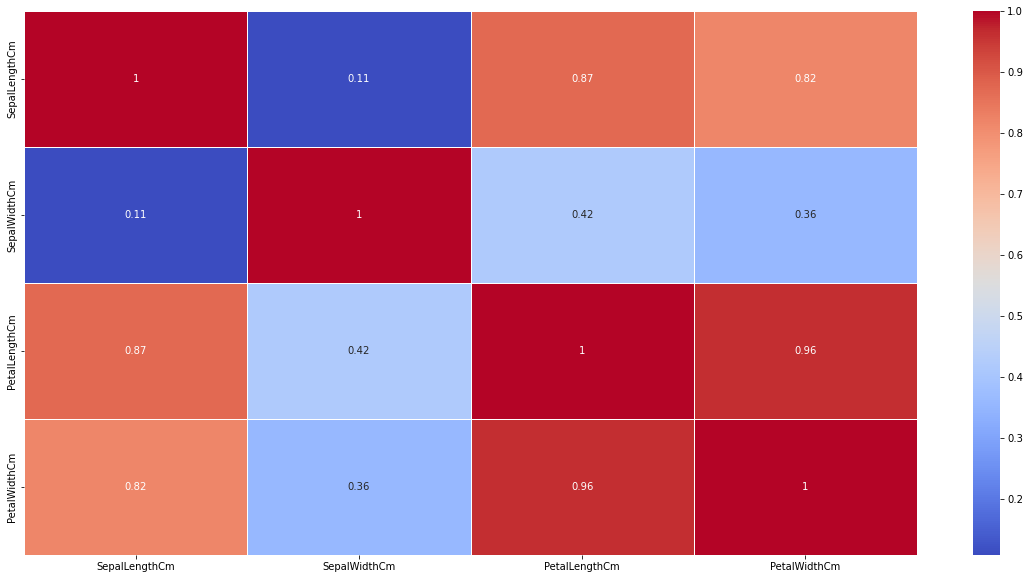

In [15]:
#data Correlation matrix

data.corr()

plt.figure(figsize=(20,10))
sns.heatmap(abs(data.corr()), cmap='coolwarm', annot=True, linewidths=0.5)

In [16]:
#Finding the optimum number of clusters for k-means classification
# We already imported "from sklearn.cluster import KMeans"
wcss = [] # within cluster sum of squares(wcss)
x = data.iloc[:, [0, 1, 2, 3]].values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Using the elbow method to determine the optimal number of clusters for k-means clustering¶


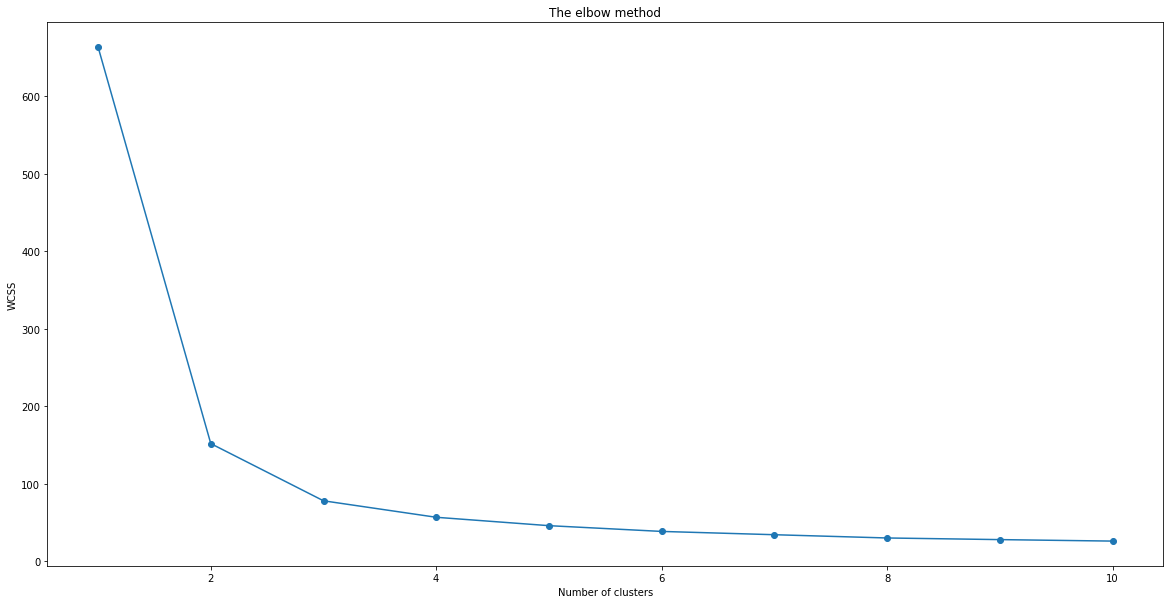

In [17]:
plt.figure(figsize=(20,10))
plt.plot(range(1, 11), wcss , marker = 'o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
kmeans.cluster_centers_

array([[5.01041667, 3.43125   , 1.4625    , 0.25      ],
       [5.90327869, 2.74918033, 4.38196721, 1.42622951],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

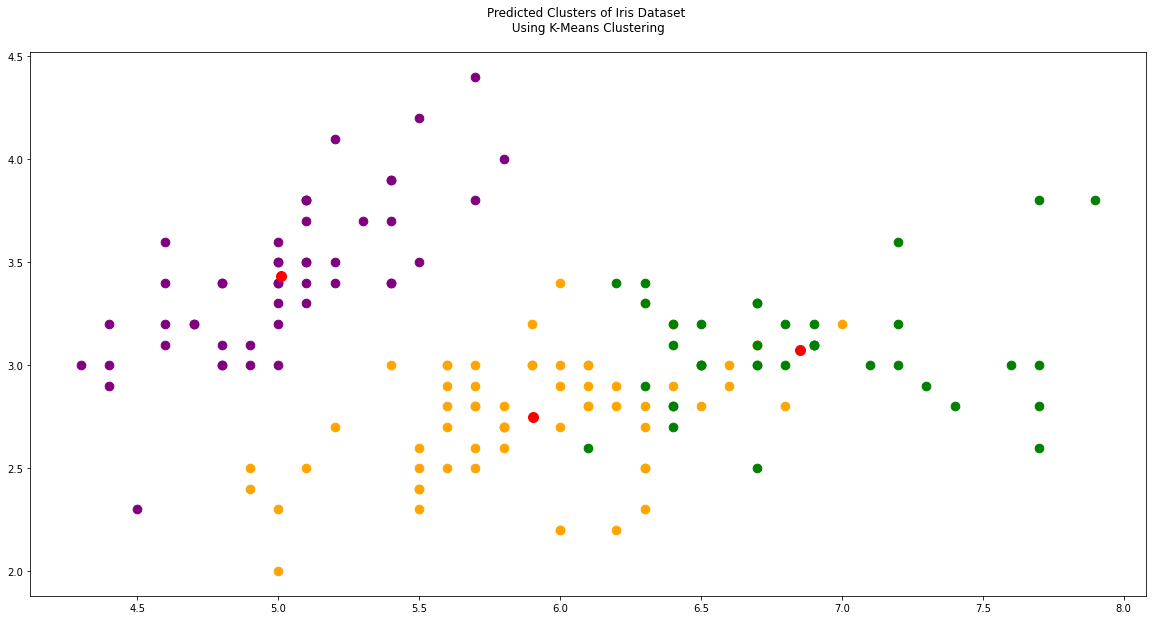

In [19]:
plt.figure(figsize=(20,10))
plt.title('Predicted Clusters of Iris Dataset \n Using K-Means Clustering \n')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 75, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 75, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 75, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')